In [2]:
import mysql.connector as mysql
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
def get_db_connection():
    con = mysql.connect(host='localhost',user="root", port= 3306,password="a",database="creditcard_capstone_")
    return con

# Functional Requirements 3.1
Find and plot transactions, showing which transaction type occurs most often.

In [4]:
query = """SELECT transaction_type, count(transaction_type) AS No_of_Tran_Types from creditcard_capstone_.cdw_sapp_credit_card 
            GROUP BY transaction_type"""

db_con = get_db_connection()
cursor = db_con.cursor()

df = pd.read_sql(query, db_con)
#print(df.head(5))

db_con.close()

C:\Users\asha_\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'Transaction type occurs most often')

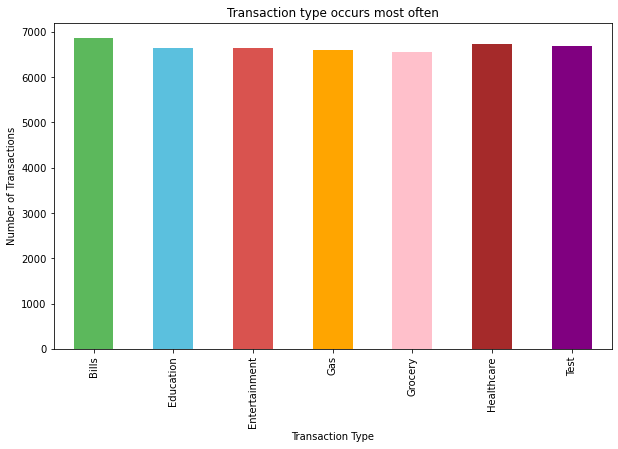

In [5]:
plt_df = df[['transaction_type','No_of_Tran_Types']]
plt_df.plot(kind='bar', x='transaction_type', y='No_of_Tran_Types', figsize=(10, 6),color=['#5cb85c','#5bc0de','#d9534f','orange','pink','brown','purple'],legend=False)


plt.xlabel('Transaction Type') # add to x-label to the plot
plt.ylabel('Number of Transactions') # add y-label to the plot
plt.title('Transaction type occurs most often') # add title to the plot

# Functional Requirements 3.2
Find and plot states, showing which state has the highest number of customers.


In [6]:
query2 = """SELECT COUNT(*) AS No_of_customers, cust_state from creditcard_capstone_.cdw_sapp_customer
            GROUP BY cust_state"""

db_con = get_db_connection()
cursor = db_con.cursor()

df2 = pd.read_sql(query2, db_con)
print(df2.head(5))

db_con.close()

   No_of_customers cust_state
0                5         AL
1                5         AR
2               45         CA
3               14         CT
4               64         FL


C:\Users\asha_\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'Number of customers in each state in U.S')

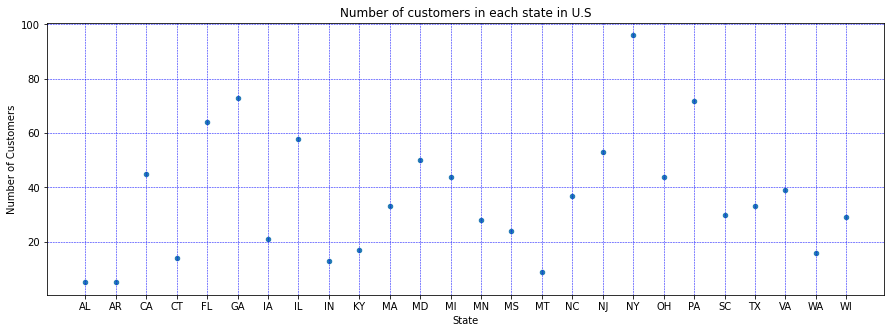

In [65]:
plt_df2 = df2[['cust_state', 'No_of_customers']]
plt_df2.plot(kind='scatter', x='cust_state', y='No_of_customers', figsize=(15, 5))
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Number of Customers') # add y-label to the plot
plt.title('Number of customers in each state in U.S') # add title to the plot

# Functional Requirements 3.3
Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount. (First 20)
hint(use CUST_SSN).


In [7]:
query3 = """SELECT cust.ssn, SUM(cc.transaction_value) AS Total_Trans_Value
            from creditcard_capstone_.cdw_sapp_credit_card cc, cdw_sapp_customer cust
            WHERE cc.CUST_SSN=cust.SSN 
            GROUP BY cc.CUST_SSN ORDER BY Total_Trans_Value desc LIMIT 20"""

db_con = get_db_connection()
cursor = db_con.cursor()

df3 = pd.read_sql(query3, db_con)
print(df3)

db_con.close()

C:\Users\asha_\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


          ssn  Total_Trans_Value
0   123451125            5633.07
1   123452783            5548.14
2   123453486            5476.08
3   123458668            5314.97
4   123456678            5261.03
5   123452026            5241.18
6   123452518            5223.96
7   123454933            5203.08
8   123457547            5149.75
9   123452085            5133.29
10  123455898            5062.33
11  123456862            5046.07
12  123451701            5023.65
13  123457070            5014.01
14  123457654            5012.81
15  123452856            5008.23
16  123456079            5008.09
17  123456849            5006.73
18  123452890            4995.10
19  123456747            4986.13


Text(0.5, 1.0, 'Hightest Total Transactions by customers')

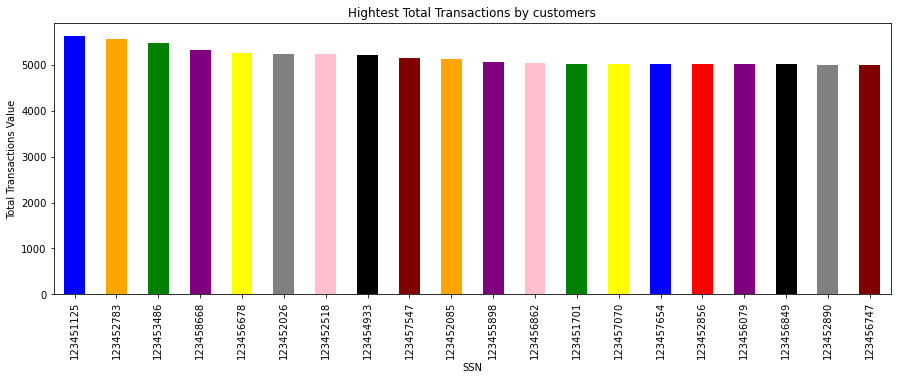

In [88]:
df3.plot(kind='bar',  x='ssn', y='Total_Trans_Value', figsize=(15, 5),color = ['blue','orange','Green','purple','yellow','gray','pink','black','maroon','orange','purple','pink','green','yellow','blue','red','purple','black','gray','maroon'],legend=False)
#plt.legend(title = "Highest number of customers in state")
#plt.legend(loc='upper right')
plt.xlabel('SSN') # add to x-label to the plot
plt.ylabel('Total Transactions Value') # add y-label to the plot
plt.title('Hightest Total Transactions by customers') # add title to the plot

# Functional Requirements 3.4
Find and plot the top three months with the largest transaction data.

In [8]:
query4 = """SELECT MONTHNAME(timeid) AS months, COUNT(transaction_id) AS Trans_data
            from creditcard_capstone_.cdw_sapp_credit_card
            GROUP BY months ORDER BY Trans_data desc LIMIT 3"""

db_con = get_db_connection()
cursor = db_con.cursor()

df4 = pd.read_sql(query4, db_con)
print(df4)

db_con.close()

     months  Trans_data
0  February        3959
1   October        3946
2       May        3946


C:\Users\asha_\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0, 0.5, 'Transactions value')

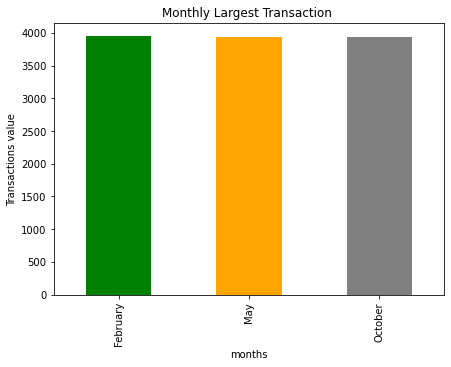

In [97]:
df4.plot(kind="bar",x= "months", y = "Trans_data",figsize=(7,5),color=['green','orange','gray'], legend=False )
plt.title('Monthly Largest Transaction ')
plt.xlabel('months')
plt.ylabel('Transactions value')

# Functional Requirements 3.5
Find and plot each branches healthcare transactions, showing which branch  processed the highest total dollar value of healthcare transactions.
Note: Take a screenshot of the graph. 


In [24]:
query5 = """SELECT b.branch_code,SUM(cc.transaction_value) as trans_value, cc.transaction_type
            from cdw_sapp_credit_card cc join cdw_sapp_branch b on cc.branch_code = b.branch_code
            GROUP BY b.branch_code HAVING cc.transaction_type='Healthcare' ORDER BY cc.transaction_value DESC"""

db_con = get_db_connection()
cursor = db_con.cursor()

df5 = pd.read_sql(query5, db_con)
print(df5)

db_con.close()

C:\Users\asha_\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


    branch_code  trans_value transaction_type
0            81     21838.17       Healthcare
1            74     20546.83       Healthcare
2            28     19844.21       Healthcare
3             5     22053.74       Healthcare
4            89     19142.95       Healthcare
5           158     20809.53       Healthcare
6            46     23507.66       Healthcare
7            25     22401.72       Healthcare
8            51     20453.29       Healthcare
9            16     22766.42       Healthcare
10          111     22377.31       Healthcare
11           59     21248.57       Healthcare
12          123     21401.06       Healthcare
13           12     20430.59       Healthcare
14           91     20097.97       Healthcare
15          117     22365.06       Healthcare
16           24     21910.62       Healthcare
17          107     21238.12       Healthcare
18           11     19266.87       Healthcare
19           58     19677.29       Healthcare


Text(0.5, 1.0, 'Healthcare transactions of each branch')

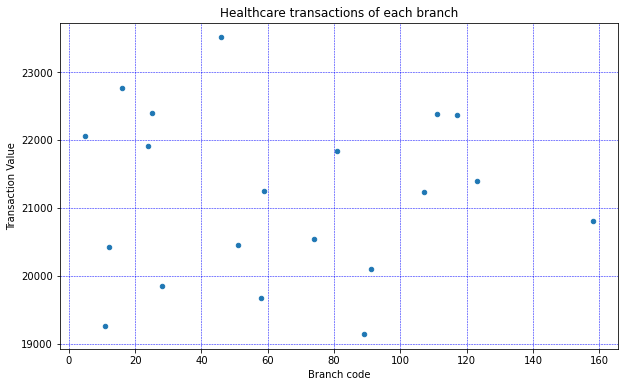

In [25]:
plt_df = df5[['trans_value','branch_code']]
plt_df.plot(kind='scatter', x='branch_code',y='trans_value', figsize=(10, 6))
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)

plt.xlabel('Branch code') # add to x-label to the plot
plt.ylabel('Transaction Value') # add y-label to the plot
plt.title('Healthcare transactions of each branch') # add title to the plot